In [ ]:
#opendata.ps  colab: https://colab.research.google.com/drive/15iIEKCCoIdgW68OdMJK4hlwA_4Gz4t5E?usp=sharing

In [1]:
import pandas as pd
import re
accents = re.compile(r'[\u064b-\u0652\u0640]') # harakaat and tatweel

In [3]:
# 2017 census -> http://www.opendata.ps/dataset/population/resource/52686866-14ce-49c8-aa65-06ac7363f724
url = "http://www.opendata.ps/dataset/035e7f1d-b412-4f67-aabb-bc6b147d83f7/resource/52686866-14ce-49c8-aa65-06ac7363f724/download/census-ages-2017.csv"  
df = pd.read_csv(url)
df.head()

,Year,Governorate,Governorate_a,Locality,0_4_M,5_9_M,10_14_M,15_19_M,20_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_64_M,65P_M,Unknown_M,0_4_F,5_9_F,10_14_F,15_19_F,20_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_64_F,65P_F,Unknown_F
0,2017,Bethlehem,بيت لحم,الوَلَجَة,155,172,155,147,138,110,95,68,79,65,55,60,18,43,0,125,145,140,161,130,103,87,78,63,71,67,35,23,55,0
1,2017,Bethlehem,بيت لحم,بَتِّير,246,212,231,244,214,214,165,125,141,136,115,94,55,106,0,261,248,240,232,227,195,169,151,129,133,116,67,51,129,0
2,2017,Bethlehem,بيت لحم,العُبَيْدِيَّة,1236,989,790,827,797,667,506,362,333,295,188,113,93,144,0,1194,919,804,788,732,573,423,345,305,272,212,142,86,171,0
3,2017,Bethlehem,بيت لحم,مُخَيَّمْ عايدَة,188,164,140,147,146,136,98,83,70,72,72,39,27,38,0,145,149,155,142,142,130,102,89,66,64,66,35,29,60,0
4,2017,Bethlehem,بيت لحم,خَلَّة النُعْمَان,1,6,6,6,7,4,3,2,3,2,3,1,5,3,0,3,4,6,11,6,1,5,4,6,2,2,4,5,0,0


In [4]:
df['Governorate'].value_counts()

Hebron                   115
Jenin                     84
Ramallah and Al-Bireh     80
Nablus                    66
Bethlehem                 51
Tulkarm                   38
Qalqilia                  34
Jerusalem                 30
Tubas                     21
Salfit                    20
Jericho and Al Aghwar     14
Dier al Balah             11
Khan Yunis                 8
Gaza                       5
North Gaza                 5
Rafah                      4
Name: Governorate, dtype: int64

In [5]:
df_tubas = df[df['Governorate']=='Tubas']
df_tubas.head()

,Year,Governorate,Governorate_a,Locality,0_4_M,5_9_M,10_14_M,15_19_M,20_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_64_M,65P_M,Unknown_M,0_4_F,5_9_F,10_14_F,15_19_F,20_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_64_F,65P_F,Unknown_F
398,2017,Tubas,طوباس,بَرْدَلَة,117,108,97,89,77,65,60,41,47,28,38,16,11,23,0,91,73,95,85,77,62,54,45,39,42,25,26,17,36,0
399,2017,Tubas,طوباس,عِيْن البَيْضَا,85,80,81,69,59,42,38,37,36,34,16,9,10,12,0,61,71,69,53,51,43,32,30,33,21,15,10,8,17,0
400,2017,Tubas,طوباس,كَرْدَلَة,6,10,17,15,7,13,4,3,5,9,7,2,2,3,0,5,9,19,16,10,4,3,6,11,4,4,0,1,5,0
401,2017,Tubas,طوباس,خِرْبِة تَل الحِمَّة,4,5,0,2,4,10,5,4,0,1,0,2,1,4,0,11,3,0,0,3,6,3,0,1,1,1,1,0,4,0
402,2017,Tubas,طوباس,إبْزِيق,9,10,5,12,10,4,6,2,3,1,0,1,1,3,0,12,10,11,3,6,4,0,4,4,1,2,2,1,0,0


In [6]:
cols = df_tubas.columns
cols_m = [c for c in cols if '_M' in c]
cols_f = [c for c in cols if '_F' in c]
#cols_f

In [7]:
df_tubas['total_m'] = df_tubas[cols_m].sum(axis=1)
df_tubas['total_f'] = df_tubas[cols_f].sum(axis=1)
df_tubas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Governorate,Governorate_a,Locality,0_4_M,5_9_M,10_14_M,15_19_M,20_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_64_M,65P_M,Unknown_M,0_4_F,5_9_F,10_14_F,15_19_F,20_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_64_F,65P_F,Unknown_F,total_m,total_f
398,2017,Tubas,طوباس,بَرْدَلَة,117,108,97,89,77,65,60,41,47,28,38,16,11,23,0,91,73,95,85,77,62,54,45,39,42,25,26,17,36,0,817,767
399,2017,Tubas,طوباس,عِيْن البَيْضَا,85,80,81,69,59,42,38,37,36,34,16,9,10,12,0,61,71,69,53,51,43,32,30,33,21,15,10,8,17,0,608,514
400,2017,Tubas,طوباس,كَرْدَلَة,6,10,17,15,7,13,4,3,5,9,7,2,2,3,0,5,9,19,16,10,4,3,6,11,4,4,0,1,5,0,103,97
401,2017,Tubas,طوباس,خِرْبِة تَل الحِمَّة,4,5,0,2,4,10,5,4,0,1,0,2,1,4,0,11,3,0,0,3,6,3,0,1,1,1,1,0,4,0,42,34
402,2017,Tubas,طوباس,إبْزِيق,9,10,5,12,10,4,6,2,3,1,0,1,1,3,0,12,10,11,3,6,4,0,4,4,1,2,2,1,0,0,67,60


In [8]:
df_tubas = df_tubas[['Locality','total_m', 'total_f']]
df_tubas.head()

,Locality,total_m,total_f
398,بَرْدَلَة,817,767
399,عِيْن البَيْضَا,608,514
400,كَرْدَلَة,103,97
401,خِرْبِة تَل الحِمَّة,42,34
402,إبْزِيق,67,60


In [9]:
df_tubas.tail()

,Locality,total_m,total_f
414,خِرْبِة الرَاس الأحْمَر,42,31
415,وادي الفارِعَة,2031,1910
416,طَمُّون,6531,6399
417,خِرْبِة عَاطُوف,107,106
418,الحَدِيدِيَّة,78,102


In [10]:
df_tubas['Locality'] = df_tubas['Locality'].apply(lambda x: accents.sub('', x))

In [58]:
df_tubas.head()

,Locality,total_m,total_f,reshaped
398,بردلة,817,767,ﺔﻟﺩﺮﺑ
399,عين البيضا,608,514,ﺎﻀﻴﺒﻟﺍ ﻦﻴﻋ
400,كردلة,103,97,ﺔﻟﺩﺮﻛ
401,خربة تل الحمة,42,34,ﺔﻤﺤﻟﺍ ﻞﺗ ﺔﺑﺮﺧ
402,إبزيق,67,60,ﻖﻳﺰﺑﺇ


In [ ]:
# the following 3 cells are needd to handle Arabic in the plot

In [26]:
!pip install --upgrade -q arabic-reshaper
!pip install -q python-bidi

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
df_tubas['reshaped'] = df_tubas['Locality'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
df_tubas.head()

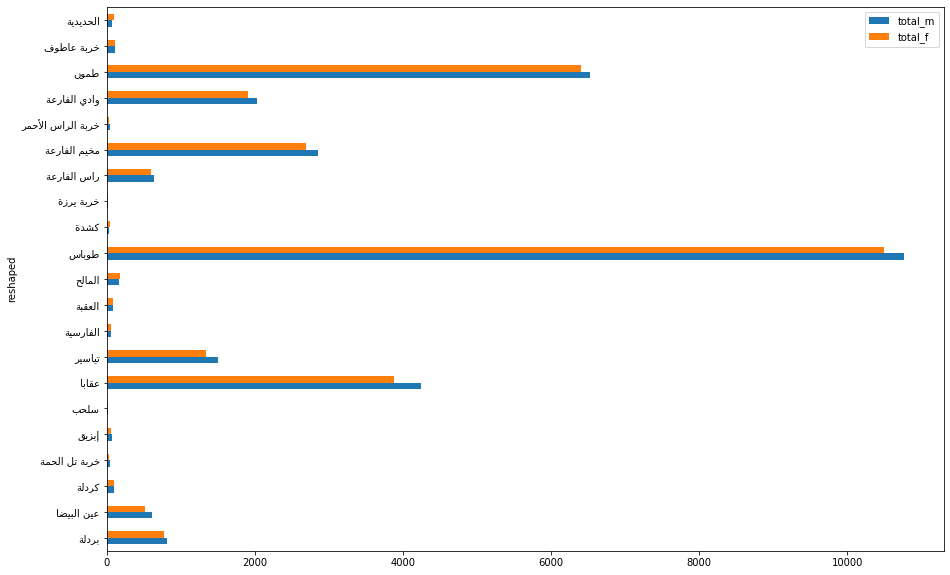

In [71]:
df_tubas.plot(x='reshaped', kind='barh', figsize=(15, 10)); 

In [75]:
# higher ed -> http://www.opendata.ps/dataset/graduates/resource/410d8f65-c09f-4a67-9e67-2b79ba040c52
url2 = "http://www.opendata.ps/dataset/fc9e395d-e78c-4a2d-880d-4b27951b68b6/resource/410d8f65-c09f-4a67-9e67-2b79ba040c52/download/graduates_since_2003_en.csv"
df2 = pd.read_csv(url2)
df2.head()

,Count,Gender,Institution Type,Governance Type,Institution Name,ISCED Level1,ISCED Level2,Faculty or Program,Specilaization,Scentific Degree,Acadmic Year,Year Enrolled,Student district,Study District,HEI District,Area
0,2,Male,Open University,Public,A-Quds Open University,Education,Teacher Training,Education,Math,Bachelor,2003-2004,1997,Unknown-WB,Unknown-WB,Jerusalem,West Bank
1,1,Female,Open University,Public,A-Quds Open University,Education,Teacher Training,Education,Math,Bachelor,2004-2005,1992,Unknown-WB,Unknown-WB,Jerusalem,West Bank
2,2,Female,Open University,Public,A-Quds Open University,Education,Teacher Training,Education,Math,Bachelor,2005-2006,1997,Unknown-WB,Unknown-WB,Jerusalem,West Bank
3,1,Female,Open University,Public,A-Quds Open University,Education,Teacher Training,Education,Math,Bachelor,2005-2006,2002,Unknown-WB,Unknown-WB,Jerusalem,West Bank
4,1,Female,Open University,Public,A-Quds Open University,Education,Teacher Training,Education,Math,Bachelor,2006-2007,2001,Bethlehem,Bethlehem,Jerusalem,West Bank


In [76]:
df2p = pd.pivot_table(df2, values = 'Count', index=['Institution Name','Gender', 'Specilaization'], columns = None, aggfunc='sum').reset_index()
df2p.head()

,Institution Name,Gender,Specilaization,Count
0,Inash El Usra College,Female,Hebrew,7
1,Inash El Usra College,Female,Nursing,331
2,Inash El Usra College,Female,Physiotherapy,38
3,Inash El Usra College,Female,Secretary & Medical Records,168
4,Inash El Usra College,Male,Hebrew,6


In [77]:
df2p.tail()

,Institution Name,Gender,Specilaization,Count
2843,Woman Community College- Ramallah,Male,Photography,25
2844,Woman Community College- Ramallah,Male,Programming & Databases,42
2845,Woman Community College- Ramallah,Male,Secretary & Medical Records,1
2846,Woman Community College- Ramallah,Male,Speech Therapy & Language Disorders,1
2847,Woman Community College- Ramallah,Male,Teaching Methods of Science & Technology,1


In [78]:
df2p.to_csv('grads.csv', index=None)

In [79]:
!head -n10 grads.csv

Institution Name,Gender,Specilaization,Count
 Inash El Usra College,Female,Hebrew,7
 Inash El Usra College,Female,Nursing,331
 Inash El Usra College,Female,Physiotherapy,38
 Inash El Usra College,Female,Secretary & Medical Records,168
 Inash El Usra College,Male,Hebrew,6
 Inash El Usra College,Male,Nursing,48
 Inash El Usra College,Male,Physiotherapy,10
 Inash El Usra College,Male,Secretary & Medical Records,24
 University of Palestine,Female, Software Engineering,54
